In [22]:
#Import packages
import pandas as pd
import numpy as np
import pandas_dedupe
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [84]:
df = pd.read_csv('SW_Boggis_english.csv')

In [85]:
#drop null values (i.e. any rows of text that are not talkwall actions)
df.dropna(inplace=True)

In [86]:
df = df.reset_index()

In [26]:
df

,index,Speaker,Dialogue,TW Event type
0,0,teacher,You'll find us in the kitchen on the shelf. W...,Edit Task
1,1,teacher,Post your guesses.,Create Task
2,2,teacher,#Group1 #Group2 #Group3 #Group 4 #Group5 #Group6,Create Message
3,56,teacher,Cups,Pin Message
4,59,#Group 5,Cups,Create Message
5,60,#group 3,3 little mice,Create Message
6,61,Group 4,Rats # group 4,Create Message
7,62,teacher,Cups,Move Message
8,66,#group 3,3 little mice # group 3,Edit Message
9,68,Group 1,Cups #group 1,Create Message


In [30]:
#create a unique id for each name
list_ids = [{v: k for k, v in enumerate(
   OrderedDict.fromkeys(df.Speaker))}
      [n] for n in df.Speaker]

In [31]:
#create a column with the name id's
df['name_id'] = list_ids

In [32]:
#create a unique id for each name
list_text = [{v: k for k, v in enumerate(
   OrderedDict.fromkeys(df.Dialogue))}
      [n] for n in df.Dialogue]

In [33]:
#create a column with the name id's
df['text_id'] = list_text

In [35]:
df['text_id']+= 6

In [36]:
df

,index,Speaker,Dialogue,TW Event type,name_id,text_id
0,0,teacher,You'll find us in the kitchen on the shelf. W...,Edit Task,0,6
1,1,teacher,Post your guesses.,Create Task,0,7
2,2,teacher,#Group1 #Group2 #Group3 #Group 4 #Group5 #Group6,Create Message,0,8
3,56,teacher,Cups,Pin Message,0,9
4,59,#Group 5,Cups,Create Message,1,9
5,60,#group 3,3 little mice,Create Message,2,10
6,61,Group 4,Rats # group 4,Create Message,3,11
7,62,teacher,Cups,Move Message,0,9
8,66,#group 3,3 little mice # group 3,Edit Message,2,12
9,68,Group 1,Cups #group 1,Create Message,4,13


In [39]:
add_nodes_from_list = df['text_id'].tolist()

In [40]:
add_nodes_from_list2 = df['name_id'].tolist()

In [42]:
#create tuples of name id's and cluster id's which will be the edges in the network
df['tuple_edges'] = list(zip(df['text_id'], df['name_id']))

In [43]:
df

,index,Speaker,Dialogue,TW Event type,name_id,text_id,tuple_edges
0,0,teacher,You'll find us in the kitchen on the shelf. W...,Edit Task,0,6,"(6, 0)"
1,1,teacher,Post your guesses.,Create Task,0,7,"(7, 0)"
2,2,teacher,#Group1 #Group2 #Group3 #Group 4 #Group5 #Group6,Create Message,0,8,"(8, 0)"
3,56,teacher,Cups,Pin Message,0,9,"(9, 0)"
4,59,#Group 5,Cups,Create Message,1,9,"(9, 1)"
5,60,#group 3,3 little mice,Create Message,2,10,"(10, 2)"
6,61,Group 4,Rats # group 4,Create Message,3,11,"(11, 3)"
7,62,teacher,Cups,Move Message,0,9,"(9, 0)"
8,66,#group 3,3 little mice # group 3,Edit Message,2,12,"(12, 2)"
9,68,Group 1,Cups #group 1,Create Message,4,13,"(13, 4)"


In [53]:
add_nodes_from_list2

[0, 0, 0, 0, 1, 2, 3, 0, 2, 4, 5, 2, 4, 3, 1, 4, 4, 4, 5, 4, 4, 4]

In [65]:
from networkx.algorithms import bipartite

B = nx.Graph()
# Add the node attribute "bipartite"
B.add_nodes_from(add_nodes_from_list, bipartite=0)
B.add_nodes_from(add_nodes_from_list2, bipartite=1)
B.add_edges_from(df['tuple_edges'])

In [66]:
u = [n for n in B.nodes if B.nodes[n]['bipartite'] == 0]
nx.bipartite.maximum_matching(B, top_nodes=u)

{6: 0,
 9: 1,
 10: 2,
 11: 3,
 13: 4,
 14: 5,
 0: 6,
 1: 9,
 2: 10,
 3: 11,
 4: 13,
 5: 14}

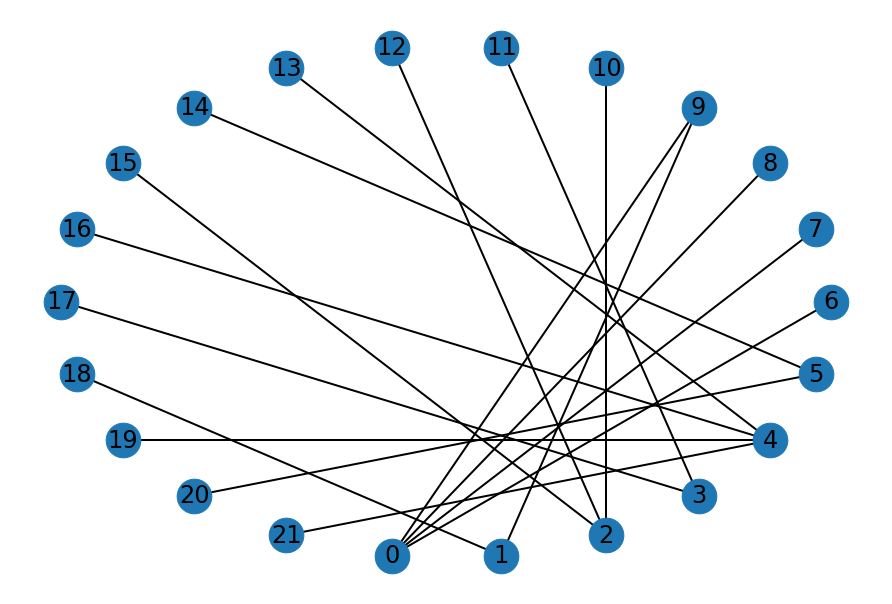

In [64]:
# generate an empty graph
nx.draw_circular(B, with_labels=True)
plt.show()

In [55]:
B

In [56]:
labels = {}    
for node in B.nodes():
    #set the node name as the key and the label as its value 
    labels[node] = node

In [57]:
B.edges

EdgeView([(6, 0), (7, 0), (8, 0), (9, 0), (9, 1), (10, 2), (11, 3), (12, 2), (13, 4), (14, 5), (15, 2), (16, 4), (17, 3), (18, 1), (19, 4), (20, 5), (21, 4)])

In [71]:
node_centrality = nx.betweenness_centrality(B)
edge_centrality = nx.edge_betweenness_centrality(B)

In [72]:
{k: v for k, v in sorted(node_centrality.items(), key=lambda item: item[1])}

{1: 0.0,
 5: 0.0,
 10: 0.0,
 4: 0.02962962962962963,
 6: 0.04814814814814815,
 7: 0.0925925925925926,
 3: 0.11851851851851854,
 9: 0.21481481481481482,
 8: 0.22222222222222224,
 0: 0.24074074074074073,
 2: 0.3888888888888889}

In [73]:
#inspect clusters of text
df[df['name_id'] == 2]

,index,Speaker,Dialogue,TW Event type,name_id,text_id,tuple_edges
5,60,#group 3,3 little mice,Create Message,2,10,"(10, 2)"
8,66,#group 3,3 little mice # group 3,Edit Message,2,12,"(12, 2)"
11,646,#group 3,"I've seen an interesting scene between Zero , ...",Create Message,2,15,"(15, 2)"


In [74]:
#inspect clusters of text
df[df['name_id'] == 0]

,index,Speaker,Dialogue,TW Event type,name_id,text_id,tuple_edges
0,0,teacher,You'll find us in the kitchen on the shelf. W...,Edit Task,0,6,"(6, 0)"
1,1,teacher,Post your guesses.,Create Task,0,7,"(7, 0)"
2,2,teacher,#Group1 #Group2 #Group3 #Group 4 #Group5 #Group6,Create Message,0,8,"(8, 0)"
3,56,teacher,Cups,Pin Message,0,9,"(9, 0)"
7,62,teacher,Cups,Move Message,0,9,"(9, 0)"


Number of nodes:  11
Number of edges:  11
Edge list:
 [(0, 7), (0, 9), (0, 10), (2, 6), (2, 9), (2, 5), (2, 8), (3, 8), (3, 7), (4, 8), (4, 6)] 



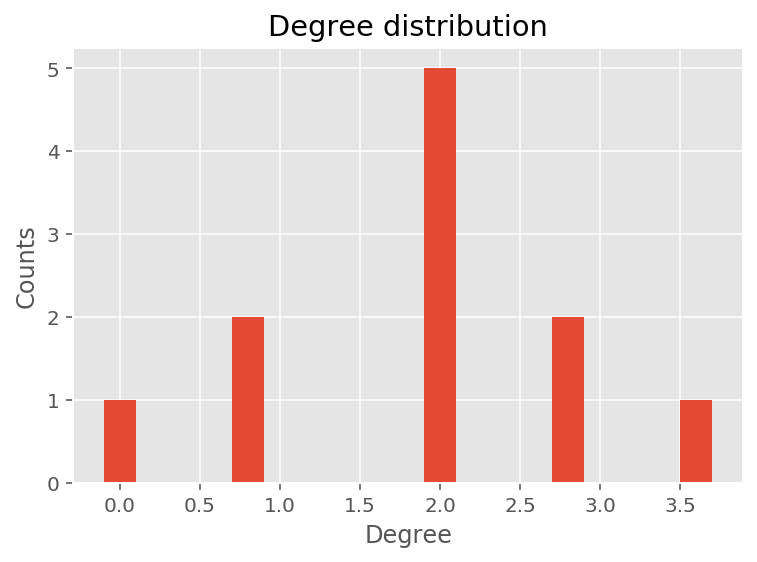

In [75]:
dict(B.degree())
# gives {1: 4, 2: 3, 3: 3, 4: 2, 5: 0, 6: 2}
print("Number of nodes: ", B.number_of_nodes())
# gives Number of nodes:  6
print("Number of edges: ", B.number_of_edges())
# gives Number of edges:  7
print("Edge list:\n", B.edges(), "\n")
# gives Edge list: [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]


plt.hist(list(dict(B.degree()).values()),
         bins=10, align='left', rwidth=0.5)
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

In [76]:
node_centrality = nx.betweenness_centrality(B)
edge_centrality = nx.edge_betweenness_centrality(B)

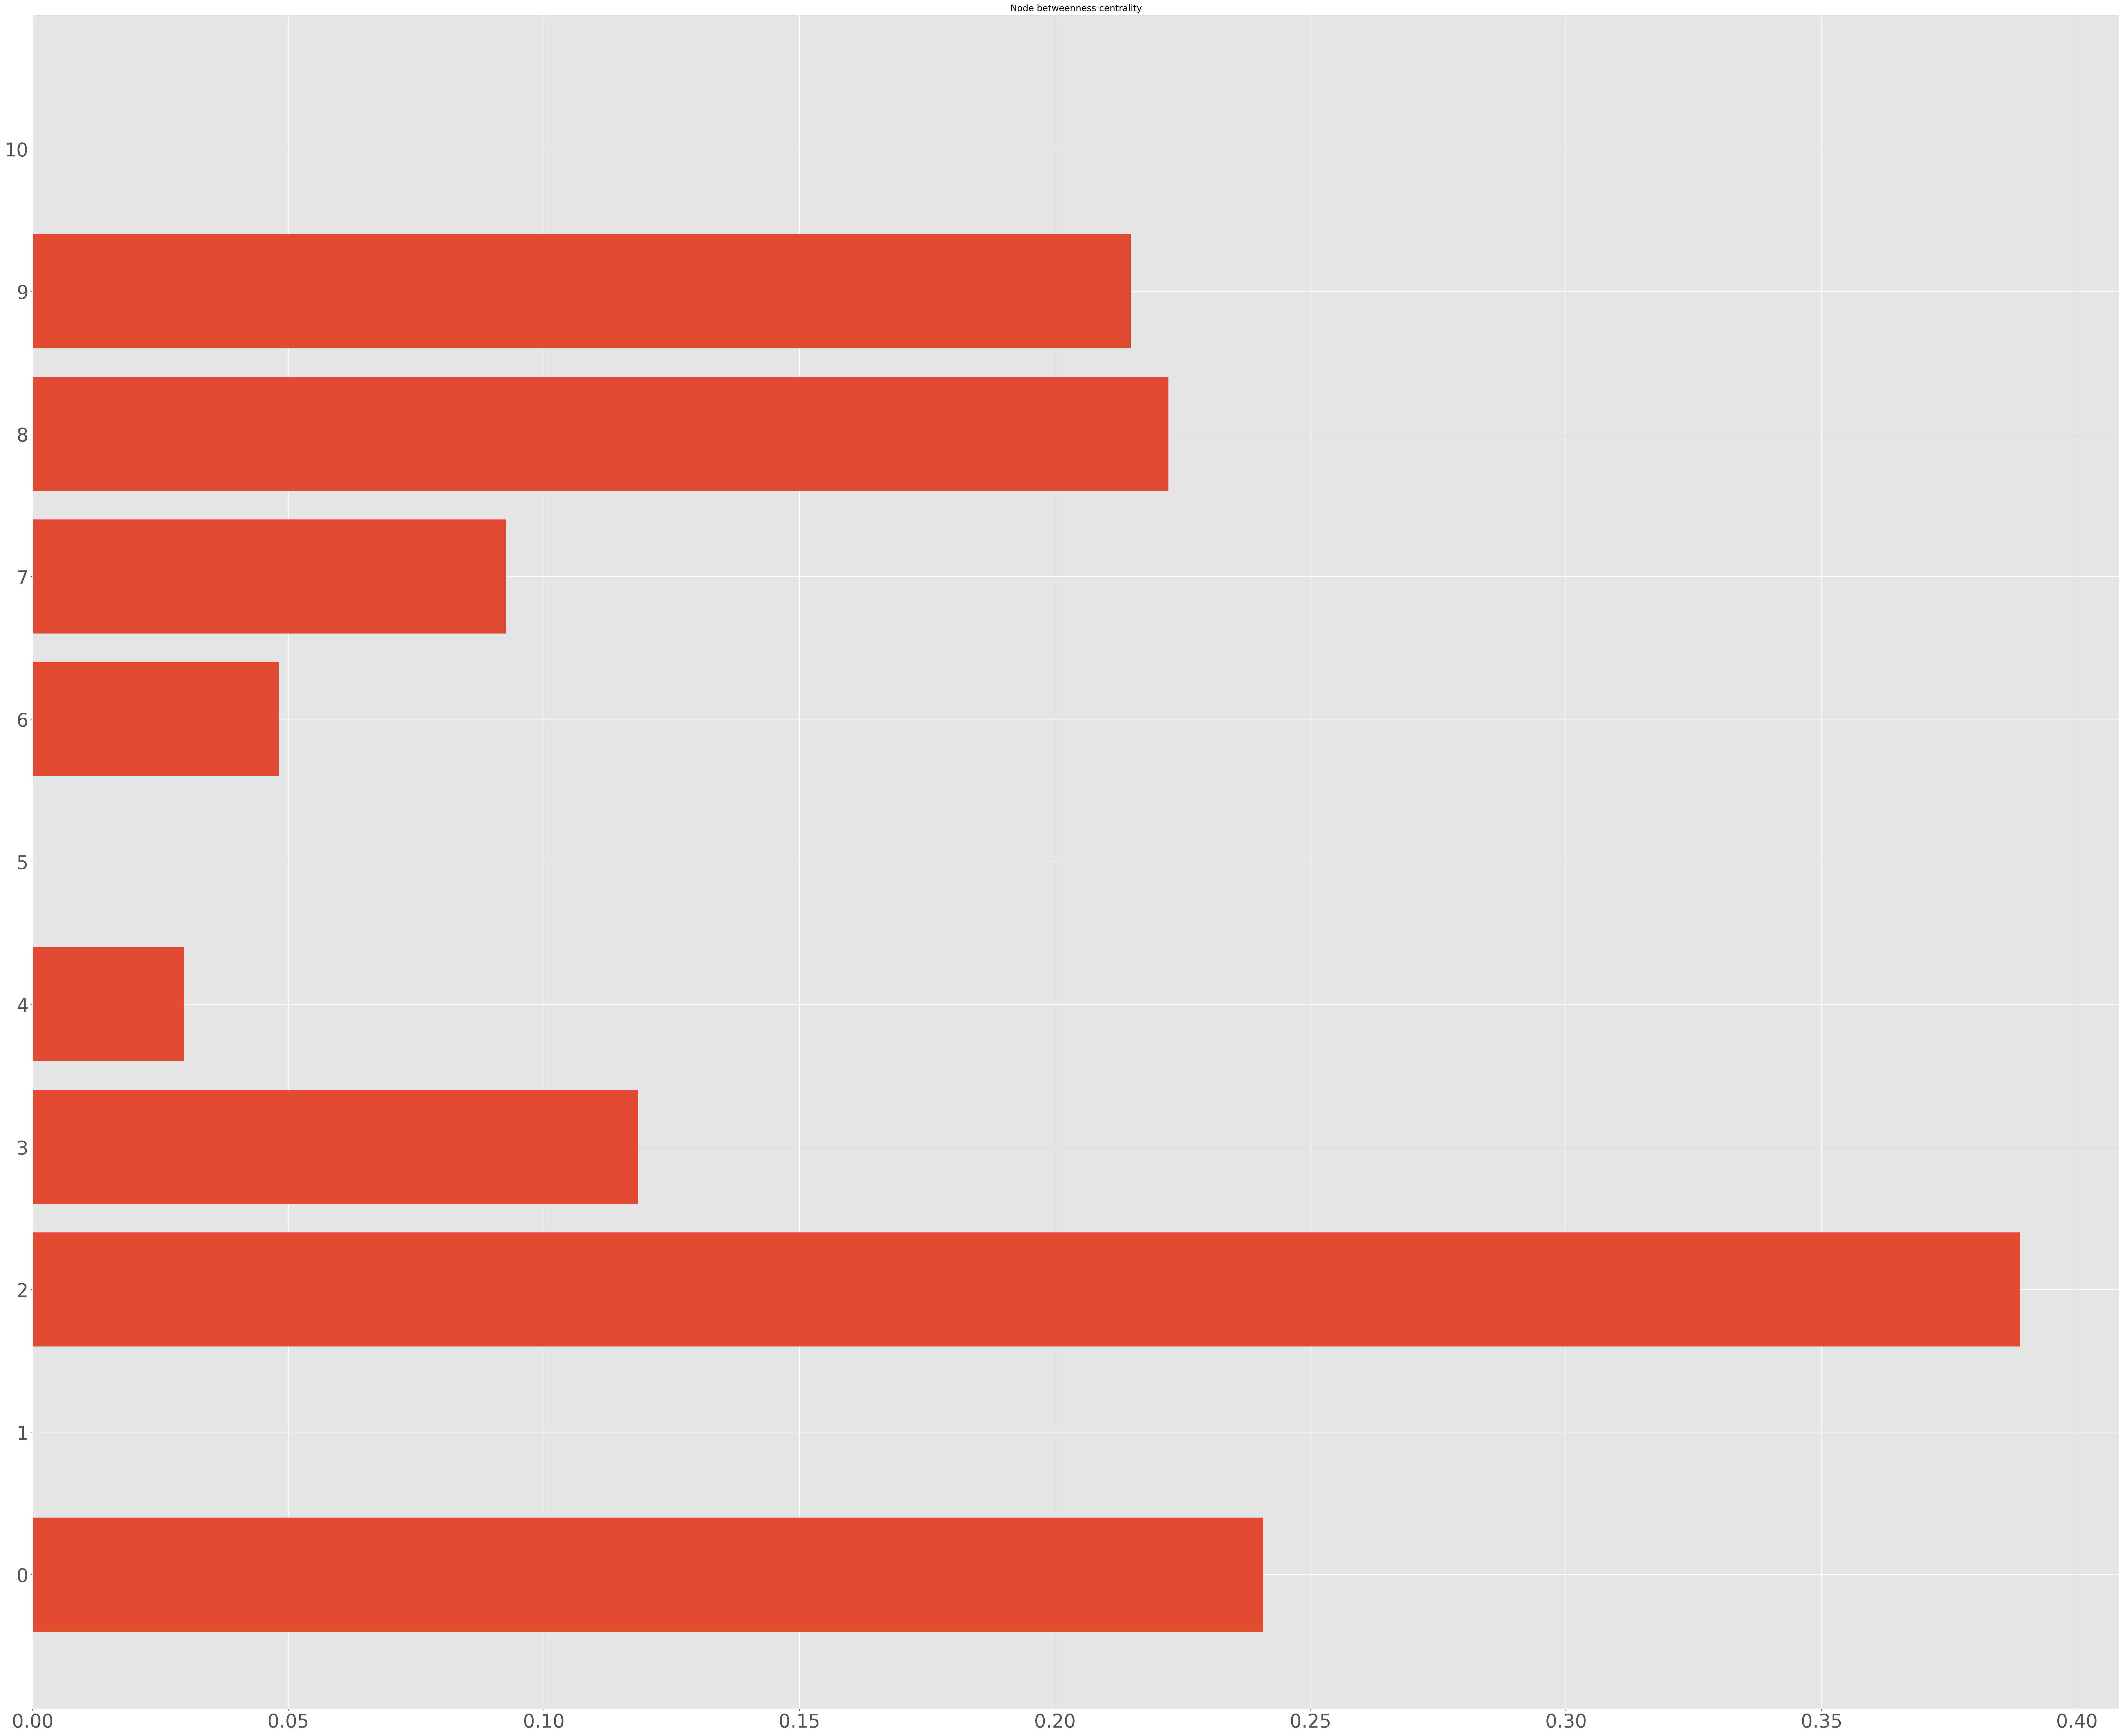

In [77]:
plt.figure(figsize=(60, 50))
plt.barh(list(range(len(list(node_centrality.values())))),
         list(node_centrality.values()))
plt.yticks(list(range(len(node_centrality))), list(node_centrality.keys()), fontsize=30)
plt.xticks(fontsize = 30)
plt.title('Node betweenness centrality')
plt.show()

In [80]:
def plot_communities(B, number_of_clusters=2, seed=1):
    GN_communities = list(nx.community.girvan_newman(B))
    pos = nx.drawing.spring_layout(B, seed=1)
    if number_of_clusters > B.number_of_nodes():
        index = B.number_of_nodes()-2
    else:
        index = number_of_clusters - 2
    G_sub = {}

    label_dict = {}
    for i, nodes in enumerate(GN_communities[index]):
        for node in nodes:
            label_dict[node] = i 
    label_list = [label_dict[node] for node in B.nodes()]

    nx.draw(B, pos=pos, node_color = label_list, cmap='rainbow', with_labels=True)
    
    plt.show()

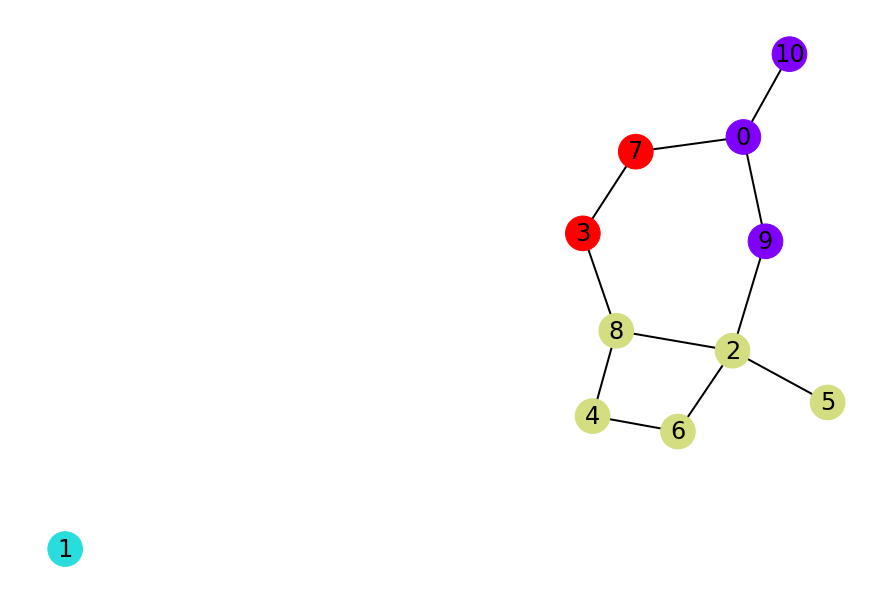

In [81]:
plot_communities(B, number_of_clusters=3)